[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/COLL-NOBEL/Data_Analysis_Project/blob/collins-branch/TyphoidAnalysis.ipynb)

# Analyse des Facteurs de la Fièvre Typhoïde et Diagnostics des Patients

## Introduction

Nous avons utilisé un fichier CSV regroupant les données de patients provenant de quatre régions d'un pays donné. Il s'agit d'une étude épidémiologique sur la fièvre typhoïde, s'appuyant sur ces données cliniques pour mettre en évidence les relations entre la maladie et divers facteurs environnementaux et physiologiques. 

Ce document présente une démarche structurée incluant l'inspection, le nettoyage et l'analyse des données, tout en fournissant des observations pertinentes et des conclusions clés. Ce processus a été rigoureusement formulé en fonction des données disponibles pour garantir la fiabilité des résultats.

Nous allons procéder par une série d'étapes détaillées.


## Exploration initiale et profilage des données


* Nous commençons par importer toutes les bibliothèques nécessaires et charger le fichier **.csv** contenant les informations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
github_url = 'https://github.com/COLL-NOBEL/Data_Analysis_Project/raw/refs/heads/collins-branch/typ.csv'

try:
    # Try loading locally
    df = pd.read_csv('typ.csv')
    print("✅ Loaded from local file.")
except:
    # If anything goes wrong (file missing, wrong path, etc.), do this:
    print("🌐 Local file not found. Loading from GitHub...")
    df = pd.read_csv(github_url)
    print("✅ Loaded from URL.")

✅ Loaded from local file.


* **Exploration des données :** À cette étape, nous approfondissons notre connaissance du jeu de données. Le code et les résultats ci-dessous présentent les informations de base, notamment le nombre de lignes et de colonnes, la présence de doublons ou de valeurs manquantes, la distribution de la température, la détection d'éventuelles valeurs aberrantes (outliers), ainsi que les valeurs uniques pour des variables critiques comme le sexe.

* **Dimensions du jeu de données :** Le code et les informations ci-dessous confirment que notre tableau comporte **300 lignes** et **9 colonnes**.

In [2]:
df.shape

(300, 9)


* **Types de données :** Les types de données pour les différentes variables de notre tableau sont présentés ci-dessous. Ils comprennent des objets (chaînes de caractères), des entiers et des nombres flottants (décimales).

In [3]:
df.dtypes

Age                       int64
Sexe                     object
Region                   object
Temperature             float64
Duree_fievre              int64
Test_typhoide            object
Source_eau               object
Acces_assainissement     object
Antibiotherapie          object
dtype: object


* **Vérification de l'intégrité :** Nous vérifions maintenant la présence de doublons ou de valeurs manquantes. Les résultats indiquent que la qualité des données est excellente, car nous ne constatons aucune répétition ni aucune valeur manquante.

In [4]:
df.isnull().sum()

Age                     0
Sexe                    0
Region                  0
Temperature             0
Duree_fievre            0
Test_typhoide           0
Source_eau              0
Acces_assainissement    0
Antibiotherapie         0
dtype: int64

In [5]:
df.isnull().values.any()

np.False_

In [6]:
df.duplicated().any()

np.False_


* **Statistiques descriptives :** Vous trouverez ci-dessous les statistiques descriptives relatives à l'âge des patients et à la durée de la fièvre.

In [7]:
df[['Age','Duree_fievre']].describe()

,Age,Duree_fievre
count,300.000000,300.000000
mean,39.993333,7.360000
std,22.276462,3.994612
min,1.000000,1.000000
25%,20.000000,4.000000
50%,39.500000,7.000000
75%,58.250000,11.000000
max,80.000000,14.000000



* **Distribution de la température corporelle :** Le code et les graphiques ci-dessous illustrent la distribution de la température corporelle des patients. Cette analyse permet également d'identifier les valeurs aberrantes (outliers). À la lecture des graphiques et des données, nous constatons qu'aucune valeur aberrante n'a été détectée.

In [8]:
df['Temperature'].describe()

count    300.000000
mean      38.543667
std        1.707311
min       35.500000
25%       37.100000
50%       38.600000
75%       40.000000
max       41.500000
Name: Temperature, dtype: float64

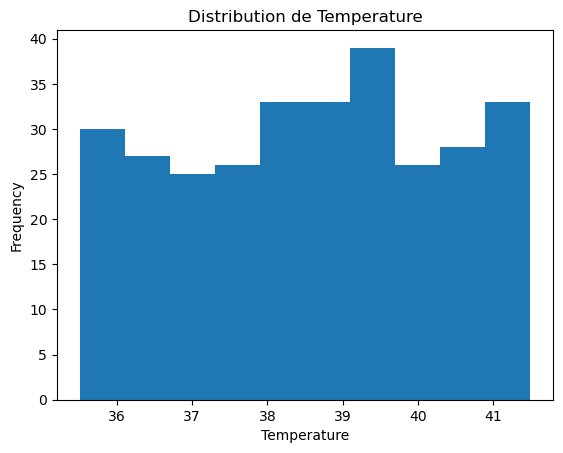

In [9]:
plt.hist(df['Temperature'].dropna())
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution de Temperature')
plt.show()

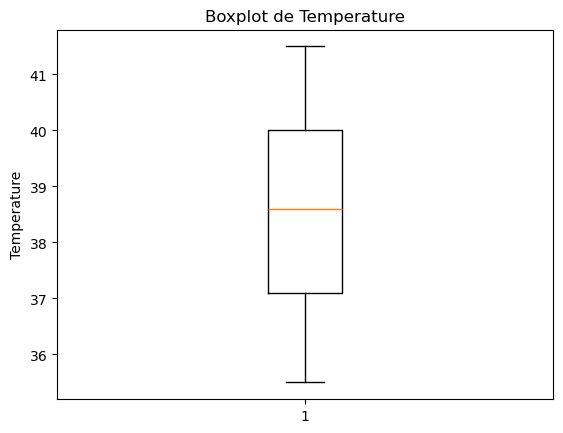

In [10]:
plt.boxplot(df['Temperature'].dropna())
plt.ylabel('Temperature')
plt.title('Boxplot de Temperature')
plt.show()

In [11]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(np.float64(37.1), np.float64(40.0), np.float64(2.8999999999999986))

In [12]:
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

borne_inf, borne_sup

(np.float64(32.75), np.float64(44.349999999999994))

<br>

Comme l'indique le tableau vide ci-dessous, **aucune valeur aberrante** n'a été détectée. Cela confirme une fois de plus la qualité et la fiabilité des données recueillies.


In [13]:
valeurs_aberrantes = df[(df['Temperature'] < borne_inf) | (df['Temperature'] > borne_sup)]
valeurs_aberrantes

,Age,Sexe,Region,Temperature,Duree_fievre,Test_typhoide,Source_eau,Acces_assainissement,Antibiotherapie


In [14]:
valeurs_aberrantes.shape[0]

0

<br>

* **Examen des valeurs uniques :** Nous examinons maintenant les valeurs uniques pour le sexe, les résultats des tests et la source d'eau. Cette étape permet de vérifier s'il y a eu des erreurs de saisie (coquilles) et d'identifier d'éventuelles catégories non souhaitées pour chaque variable.

In [15]:
df[['Sexe', 'Test_typhoide', 'Source_eau']].nunique()

Sexe             2
Test_typhoide    2
Source_eau       3
dtype: int64

<br>

Par exemple, d'après les valeurs ci-dessous, nous constatons qu'il n'existe que deux options pour les résultats des tests. Aucune variante non souhaitée, telle que **« positi »**, **« positif »** ou **« POSITIF »**, n'a été détectée, ce qui garantit la cohérence des données.

In [16]:
df['Test_typhoide'].value_counts()

Test_typhoide
Positif    185
Negatif    115
Name: count, dtype: int64

<br>

## **Analyse Descriptive et Épidémiologique**

Les données sont désormais prêtes pour le traitement. Vous trouverez ci-dessous quelques tendances associées à la fièvre typhoïde.

* **Comparaison des températures moyennes :** Vous trouverez ci-dessous une comparaison entre les températures moyennes des patients testés positifs et négatifs à la fièvre typhoïde. Les patients positifs présentent une **température moyenne** plus **élevée**.

In [17]:
df.groupby('Test_typhoide')['Temperature'].mean()

Test_typhoide
Negatif    37.936522
Positif    38.921081
Name: Temperature, dtype: float64

<br>

Nous pourrions utiliser la fonction **.describe()** à la place, afin d'obtenir des informations plus détaillées sur les valeurs minimales et maximales.

In [18]:
df.groupby('Test_typhoide')['Temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
Test_typhoide,,,,,,,,
Negatif,115.0,37.936522,1.733131,35.5,36.45,37.4,39.15,41.5
Positif,185.0,38.921081,1.581805,35.5,37.90,39.1,40.20,41.5


<br>

* **Taux de positivité par région :** Le taux de positivité à la fièvre typhoïde pour les quatre régions est présenté ci-dessous. Les régions de **l'Est** et de **l'Ouest** affichent un taux de positivité **plus élevé**, tandis que les régions du **Nord** et du **Sud** présentent des taux **plus faibles**.

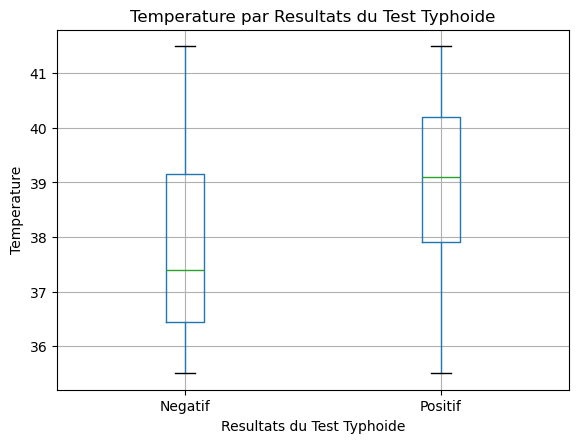

In [19]:
df.boxplot(column='Temperature', by='Test_typhoide')
plt.xlabel('Resultats du Test Typhoide')
plt.ylabel('Temperature')
plt.title('Temperature par Resultats du Test Typhoide')
plt.suptitle('')
plt.show()

In [20]:
df['Region'].value_counts()

Region
Ouest    95
Nord     72
Est      71
Sud      62
Name: count, dtype: int64

In [21]:
taux_de_positiv = (df['Test_typhoide'] == 'Positif').groupby(df['Region']).mean()
taux_de_positiv * 100

Region
Est      66.197183
Nord     56.944444
Ouest    65.263158
Sud      56.451613
Name: Test_typhoide, dtype: float64

In [22]:
df['Acces_assainissement'].value_counts()

Acces_assainissement
Oui    154
Non    146
Name: count, dtype: int64

In [23]:
df.groupby('Acces_assainissement')['Test_typhoide']\
.apply(lambda x: (x == 'Positif').mean() * 100)

Acces_assainissement
Non    64.383562
Oui    59.090909
Name: Test_typhoide, dtype: float64

<br>

* **Accès à l'assainissement :** Les personnes n'ayant **pas accès** à **l'assainissement** présentent un taux de **positivité** légèrement plus **élevé**.

In [24]:
sommaire = df.groupby('Acces_assainissement').agg(
    testes_totale = ('Test_typhoide', 'count'),
    taux_de_positi = ('Test_typhoide', lambda x: (x == 'Positif').mean() * 100)
)
sommaire

,testes_totale,taux_de_positi
Acces_assainissement,,
Non,146,64.383562
Oui,154,59.090909


<br>

* **Durée de la fièvre :** D'après les résultats de l'analyse ci-dessous, les patients testés positifs présentent, en moyenne, une durée de fièvre plus longue que les patients négatifs.

In [25]:
# Comparaison de la durée moyenne de la fièvre entre les patients positifs et négatifs
duree_moyenne = df.groupby('Test_typhoide')['Duree_fievre'].mean()
duree_moyenne

Test_typhoide
Negatif    6.078261
Positif    8.156757
Name: Duree_fievre, dtype: float64

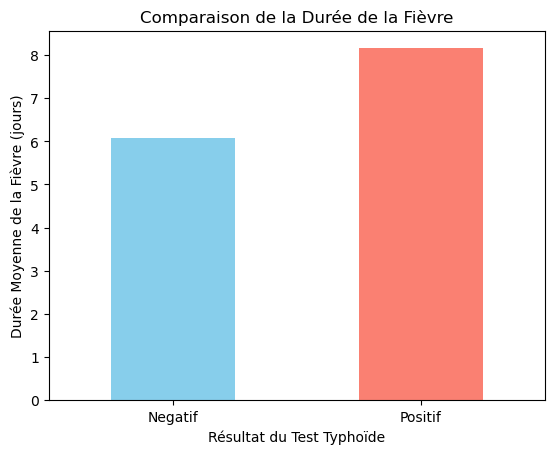

In [26]:
# Optionnel : Visualisation avec un diagramme à barres
duree_moyenne.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Résultat du Test Typhoïde')
plt.ylabel('Durée Moyenne de la Fièvre (jours)')
plt.title('Comparaison de la Durée de la Fièvre')
plt.xticks(rotation=0)
plt.show()

<br>

* **Association entre la source d'eau et les résultats :** En examinant le taux de positivité pour les différentes sources d'eau et en appliquant le **test du khi-deux ($\chi^2$)**, nous constatons une corrélation négligeable entre ces deux variables. Cela est confirmé par la **p-valeur** du test, qui est nettement supérieure à **0,05**, indiquant que les différences observées ne sont pas statistiquement significatives.

In [27]:
tableau_contingence_source_eau = pd.crosstab(df['Source_eau'], df['Test_typhoide'])
print("--- Tableau de Contingence ---")
print(tableau_contingence_source_eau)

--- Tableau de Contingence ---
Test_typhoide  Negatif  Positif
Source_eau                     
Potable             34       63
Puits               40       59
Riviere             41       63


In [28]:
taux_par_source = df.groupby('Source_eau')['Test_typhoide'].apply(lambda x: (x == 'Positif').mean() * 100)
print("\n--- Taux de Positivité (%) ---")
print(taux_par_source.sort_values(ascending=False))


--- Taux de Positivité (%) ---
Source_eau
Potable    64.948454
Riviere    60.576923
Puits      59.595960
Name: Test_typhoide, dtype: float64


In [29]:
# 3. Test de Chi-deux (pour tester l'indépendance)
chi2, p_val, dof, expected = chi2_contingency(tableau_contingence_source_eau)
print(f"\n--- Test de Chi-deux ---")
print(f"Statistique Chi2 : {chi2:.4f}")
print(f"Valeur p (p-value) : {p_val:.4f}")


--- Test de Chi-deux ---
Statistique Chi2 : 0.6738
Valeur p (p-value) : 0.7140


<br>

Vous trouverez ci-dessous un graphique à barres illustrant les résultats positifs et négatifs pour les différentes sources d'eau.

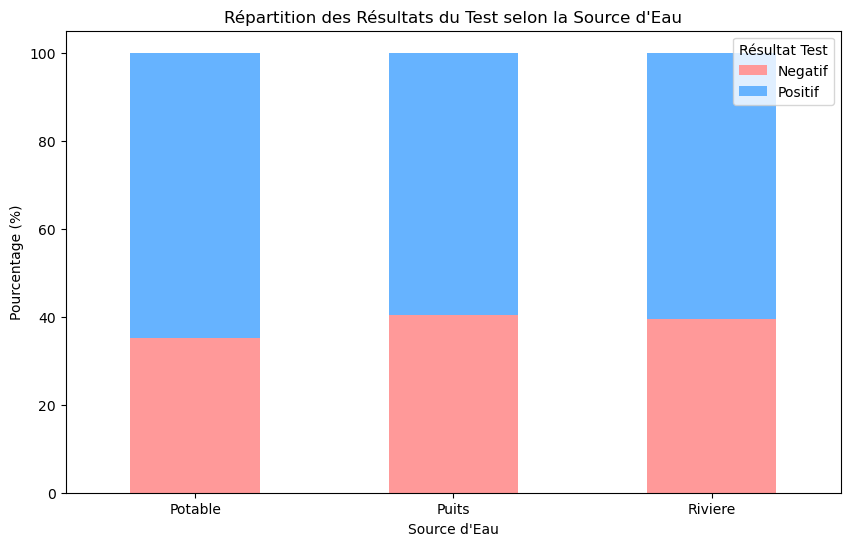

In [32]:
# 4. Visualisation : Graphique à barres empilées
tableau_percent = tableau_contingence_source_eau.div(tableau_contingence_source_eau.sum(1), axis=0) * 100
tableau_percent.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], figsize=(10, 6))
plt.title('Répartition des Résultats du Test selon la Source d\'Eau')
plt.xlabel('Source d\'Eau')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Résultat Test', loc='upper right')
plt.xticks(rotation=0)
plt.show()

<br>

## **Analyse de la qualité des données**

### **Valeurs extrêmes de température :**
D'après les données ci-dessous, nous constatons que la température **maximale théorique** autorisée est de **44,35** et la **température minimale** de **32,75**. Les températures maximale et minimale réellement enregistrées étant respectivement de **41,5** et **35,5**, nous confirmons qu'il n'y a aucune valeur extrême (valeurs aberrantes).

In [33]:
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

borne_inf, borne_sup

(np.float64(32.75), np.float64(44.349999999999994))

In [34]:
temp_max = df['Temperature'].max()
temp_min = df['Temperature'].min()

print(f"La température maximale est : {temp_max}")
print(f"La température minimale est : {temp_min}")

La température maximale est : 41.5
La température minimale est : 35.5


<br>

Les valeurs aberrantes peuvent poser un véritable problème, car elles risquent de fausser la moyenne, de biaiser la distribution dans des directions statistiquement erronées et de gonfler artificiellement la variabilité, entraînant ainsi des statistiques inexactes. Pour être exploitables, les données doivent être propres et refléter la situation réelle de la manière la plus précise possible ; or, ces valeurs extrêmes peuvent altérer gravement les données et les résultats de l'analyse. Si les résultats ne sont pas fiables, les conclusions tirées ne seront d'aucune utilité pour résoudre des problèmes concrets, et pourraient même s'avérer préjudiciables.

<br>

### **Valeurs manquantes, la variable "Durée_fièvre":**
D'après les valeurs ci-dessous, nous constatons qu'il n'y a aucune donnée manquante dans la colonne « Durée_fièvre ». Cela renforce davantage la qualité et la fiabilité du jeu de données actuel.

In [35]:
manquantes = df['Duree_fievre'].isnull().sum()
print(f"Le nombre de valeurs manquantes est : {manquantes}")

Le nombre de valeurs manquantes est : 0


<br>

En cas de valeurs extrêmes, manquantes ou non souhaitées dans nos données, il peut être nécessaire de procéder à un nettoyage spécifique afin de modifier ces valeurs. Vous trouverez ci-dessous une liste des actions possibles pour traiter les anomalies détectées dans notre jeu de données.

* **Suppression :** Cette méthode consiste à retirer de l'analyse les observations (lignes) ou les variables (colonnes) qui contiennent des données manquantes ou non souhaitées.
    * **Suppression par liste :** On supprime une ligne entière dès qu'une seule valeur est manquante. Cette approche est courante lorsque le jeu de données est très vaste et que les données manquent de manière aléatoire.
    * **Suppression de caractéristique :** Si une colonne présente plus de 50 à 60 % de données manquantes, elle peut être entièrement supprimée car elle n'apporte pas assez de signal statistique.
&nbsp;        
* **Imputation :** Ce processus consiste à remplacer les données manquantes par des valeurs substituées en se basant sur les autres informations disponibles. Au lieu de supprimer la ligne ou la colonne, on remplace la donnée problématique par une valeur spécifique :
    * **Imputation par la moyenne ou la médiane :** Remplacement par la valeur moyenne ou centrale de la variable.
    * **Imputation par le mode :** Remplacement par la valeur la plus fréquente (idéal pour les données catégorielles).
    * **Imputation prédictive :** Utilisation de l'apprentissage automatique (machine learning) pour prédire la valeur manquante en fonction des autres attributs disponibles.
* **Conservation :** Cette approche consiste à conserver les données telles quelles, même si elles comportent des anomalies ou des lacunes. On choisit de ne pas modifier les données afin d'éviter d'introduire des biais ou des informations « artificielles ». Cette méthode est privilégiée lorsque les valeurs extrêmes sont cliniquement possibles ou lorsque l'absence d'une donnée est en soi une information pertinente qu'il vaut mieux étiqueter comme « inconnue » plutôt que de tenter de la deviner.

<br>

### **Validation de l'exactitude des données et incohérences :**
Nous pouvons confirmer davantage que nos données sont propres et précises en examinant les valeurs des différentes colonnes, telles que « Sex » et « Typhoide_test ». Les valeurs sont cohérentes, sans erreurs de saisie ni autres valeurs indésirables, comme le démontrent les résultats du code ci-dessous.

In [36]:
differents_valeur_sexe = df['Sexe'].unique()
differents_valeur_Test_typhoide = df['Test_typhoide'].unique()

print("Les differents valeurs pour « Test_typhoide » incluent :", differents_valeur_Test_typhoide)
print("Les valeurs pour « Sexe » incluent :", differents_valeur_sexe)

Les differents valeurs pour « Test_typhoide » incluent : ['Negatif' 'Positif']
Les valeurs pour « Sexe » incluent : ['M' 'F']


<br>

### Règles de validation pour des données propres et de haute qualité :

* Identifier et traiter les données manquantes de manière appropriée
* Supprimer les doublons dans les données.
* Détecter et gérer les valeurs aberrantes.
* Standardiser les données catégorielles pour assurer la cohérence de l'ensemble des données. Cela implique de corriger les erreurs de saisie (par exemple, transformer « positi » en « Positif ») ou d'utiliser le bon booléen (« Vrai » ou « 1 »).
* Vérifier la cohérence logique à travers les données.
* Valider les types de données.

<br>


## **Réflexion et rapport (Analyse critique)**


### **Principaux problèmes de qualité des données observés**
Les données fournies étaient propres, sans valeurs aberrantes ni données manquantes. Elles semblaient tout à fait authentiques, sans fautes de frappe ni défauts notables. Les types de données étaient cohérents et corrects. Par conséquent, aucune correction n'a été apportée aux données avant leur traitement. De nombreuses informations précieuses ont été extraites de ces données, lesquelles peuvent être utilisées pour prendre des décisions importantes sur les mesures à prendre afin de prévenir et de mieux gérer la typhoïde.

### **Stratégies de nettoyage adaptées à chaque problème**
Bien que les données fournies n'aient nécessité aucun nettoyage, certaines stratégies de traitement des données incluent :

* **Supprimer les doublons ou les valeurs répétées.**
* **Identifier et gérer les valeurs aberrantes (outliers).**
* **Détecter les données manquantes et les imputer, les conserver ou les supprimer.**

### **Facteurs de risque associés à la fièvre typhoïde**
Les facteurs les plus intéressants (présentant la plus forte corrélation) liés aux résultats positifs du test de la typhoïde sont la durée de la fièvre **« Duree_fievre »**, la température **« Temperature »** et l'antibiothérapie **« Antibiotherapie »**. D'autres facteurs tels que le **sexe**, la **région** et **l'âge** sont également corrélés aux résultats positifs, mais de manière plus légère. Vous trouverez ci-dessous une analyse détaillée de ces facteurs en relation avec les résultats des tests de la typhoïde.

In [37]:
taux_par_sexe = df.groupby('Sexe')['Test_typhoide'].apply(lambda x: (x == 'Positif').mean() * 100)
print("\n--- Taux de Positivité (%) ---")
print(taux_par_sexe.sort_values(ascending=False))

tableau_contingence_sexe = pd.crosstab(df['Sexe'], df['Test_typhoide'])
chi2, p_val, dof, expected = chi2_contingency(tableau_contingence_sexe)
print(f"\n--- Test de Chi-deux ---")
print(f"Statistique Chi2 : {chi2:.4f}")
print(f"Valeur p (p-value) : {p_val:.4f}")


--- Taux de Positivité (%) ---
Sexe
M    65.972222
F    57.692308
Name: Test_typhoide, dtype: float64

--- Test de Chi-deux ---
Statistique Chi2 : 1.8355
Valeur p (p-value) : 0.1755


In [38]:
taux_par_acces_assainissement = df.groupby('Acces_assainissement')['Test_typhoide'].apply(lambda x: (x == 'Positif').mean() * 100)
print("\n--- Taux de Positivité (%) ---")
print(taux_par_acces_assainissement.sort_values(ascending=False))

tableau_contingence_assainissement = pd.crosstab(df['Acces_assainissement'], df['Test_typhoide'])
chi2, p_val, dof, expected = chi2_contingency(tableau_contingence_assainissement)
print(f"\n--- Test de Chi-deux ---")
print(f"Statistique Chi2 : {chi2:.4f}")
print(f"Valeur p (p-value) : {p_val:.4f}")


--- Taux de Positivité (%) ---
Acces_assainissement
Non    64.383562
Oui    59.090909
Name: Test_typhoide, dtype: float64

--- Test de Chi-deux ---
Statistique Chi2 : 0.6783
Valeur p (p-value) : 0.4102


In [39]:
taux_par_antibiotherapie = df.groupby('Antibiotherapie')['Test_typhoide'].apply(lambda x: (x == 'Positif').mean() * 100)
print("\n--- Taux de Positivité (%) ---")
print(taux_par_antibiotherapie.sort_values(ascending=False))

tableau_contingence_antibiotherapie = pd.crosstab(df['Antibiotherapie'], df['Test_typhoide'])
chi2, p_val, dof, expected = chi2_contingency(tableau_contingence_antibiotherapie)
print(f"\n--- Test de Chi-deux ---")
print(f"Statistique Chi2 : {chi2:.4f}")
print(f"Valeur p (p-value) : {p_val:.4f}")


--- Taux de Positivité (%) ---
Antibiotherapie
Oui    73.170732
Non    47.794118
Name: Test_typhoide, dtype: float64

--- Test de Chi-deux ---
Statistique Chi2 : 19.1943
Valeur p (p-value) : 0.0000


In [40]:
taux_par_region = df.groupby('Region')['Test_typhoide'].apply(lambda x: (x == 'Positif').mean() * 100)
print("\n--- Taux de Positivité (%) ---")
print(taux_par_region.sort_values(ascending=False))

tableau_contingence_region = pd.crosstab(df['Region'], df['Test_typhoide'])
chi2, p_val, dof, expected = chi2_contingency(tableau_contingence_region)
print(f"\n--- Test de Chi-deux ---")
print(f"Statistique Chi2 : {chi2:.4f}")
print(f"Valeur p (p-value) : {p_val:.4f}")


--- Taux de Positivité (%) ---
Region
Est      66.197183
Ouest    65.263158
Nord     56.944444
Sud      56.451613
Name: Test_typhoide, dtype: float64

--- Test de Chi-deux ---
Statistique Chi2 : 2.5288
Valeur p (p-value) : 0.4701


* **Lien avec l'antibiothérapie :** D'après les résultats de l'analyse et le test du chi-deux ($\chi^2$), le taux de positivité pour la typhoïde est fortement lié à l'antibiothérapie. Jusqu'à $73\,\%$ des personnes ayant reçu un antibiotique ont été testées positives, contre seulement $47\,\%$ pour celles n'en ayant pas reçu. Cette donnée serait très utile si l'antibiotique a été administré avant la réalisation du test.

* **Forte corrélation avec la durée de la fièvre :** Il existe une corrélation très élevée entre la `Duree_fievre` et les résultats du test. Le test du chi-deux indique une p-valeur inférieure à $0,05$. Les durées de fièvre les plus longues sont associées à un taux de positivité plus important, le pic se situant dans l'intervalle de $5$ à $10$ jours.

* **Impact de la température :** La température joue un rôle majeur dans les résultats, même sans regroupement par catégories. Cependant, le regroupement des températures montre une corrélation encore plus nette : les températures basses ($35$ - $37,5$) ont un faible taux de positivité (environ $39\,\%$), les températures moyennes ($37,5$ - $39$) ont une positivité élevée (environ $68\,\%$), tandis que les températures hautes ($39$ - $42$) atteignent la positivité la plus forte (plus de $75\,\%$).

* **Corrélation avec le sexe :** Les données révèlent également une légère corrélation entre le sexe et les résultats du test. Les hommes présentent un taux de positivité plus élevé et, selon le test du chi-deux, il existe une légère dépendance statistique entre le genre et le résultat.

* **Corrélation régionale :** De même, on observe une légère corrélation entre les régions et les résultats des tests. Les régions de l'Est et de l'Ouest affichent une positivité plus élevée que le Nord et le Sud. L'Est et l'Ouest ont des taux de positivité presque identiques (environ $65\,\%$), tandis que le Nord et le Sud présentent également des taux similaires (environ $56,5\,\%$). Ce constat est précieux et invite à s'interroger sur les facteurs environnementaux ou comportementaux propres à ces deux zones.

* **Relation avec l'âge :** On note également une très légère relation entre l'âge et la positivité, en particulier chez les moins de $18$ ans qui présentent un taux de positivité plus élevé que toutes les autres tranches d'âge.

In [41]:
# 2. Creation d'une nouvelle colonne pour regrouper les regions
# Groupe 1 : Nord et Sud
# Groupe 2 : Est et Ouest
def regrouper_regions(region):
    if region in ['Nord', 'Sud']:
        return 'Nord_Sud'
    elif region in ['Est', 'Ouest']:
        return 'Est_Ouest'
    else:
        return 'Autre'

df['Groupement_Regions'] = df['Region'].apply(regrouper_regions)

#  Creation du tableau de contingence
# On croise le nouveau groupe de regions avec le resultat du test
tableau_groupement = pd.crosstab(df['Groupement_Regions'], df['Test_typhoide'])

#  Execution du test du Chi-deux
# chi2 : la statistique du test
# p_valeur : la probabilite (si < 0.05, il y a une dependance significative)
# ddl : degres de liberte
# attendu : les frequences theoriques si les variables etaient independantes
chi2, p_valeur, ddl, attendu = chi2_contingency(tableau_groupement)

# 5. Affichage des resultats
print("--- Analyse par Groupement de Regions ---")
print("Tableau de contingence (Frequences observees) :")
print(tableau_groupement)
print("\n--- Resultats Statistiques ---")
print(f"Statistique Chi-deux : {chi2:.4f}")
print(f"P-valeur : {p_valeur:.4f}")
print(f"Degres de liberte : {ddl}")

# Interpretation des resultats
if p_valeur < 0.05:
    print("\nConclusion : Il existe une dependance significative entre ces groupes de regions et les resultats du test.")
else:
    print("\nConclusion : Aucune dependance significative n'est detectee entre ces groupes de regions et les resultats du test.")

--- Analyse par Groupement de Regions ---
Tableau de contingence (Frequences observees) :
Test_typhoide       Negatif  Positif
Groupement_Regions                  
Est_Ouest                57      109
Nord_Sud                 58       76

--- Resultats Statistiques ---
Statistique Chi-deux : 2.1462
P-valeur : 0.1429
Degres de liberte : 1

Conclusion : Aucune dependance significative n'est detectee entre ces groupes de regions et les resultats du test.


In [42]:
taux_par_temperature = df.groupby('Temperature')['Test_typhoide'].apply(lambda x: (x == 'Positif').mean() * 100)
print("\n--- Taux de Positivité (%) ---")
print(taux_par_temperature.sort_values(ascending=False))

tableau_contingence_temperature = pd.crosstab(df['Temperature'], df['Test_typhoide'])
chi2, p_val, dof, expected = chi2_contingency(tableau_contingence_temperature)
print(f"\n--- Test de Chi-deux ---")
print(f"Statistique Chi2 : {chi2:.4f}")
print(f"Valeur p (p-value) : {p_val:.4f}")


--- Taux de Positivité (%) ---
Temperature
37.8    100.000000
37.6    100.000000
40.8    100.000000
40.5    100.000000
41.0    100.000000
39.7    100.000000
39.5    100.000000
39.3    100.000000
39.8    100.000000
38.6    100.000000
38.4    100.000000
40.9    100.000000
38.5     87.500000
40.7     85.714286
40.3     85.714286
39.2     83.333333
38.0     83.333333
39.6     76.923077
38.7     75.000000
40.0     75.000000
40.4     75.000000
41.5     75.000000
40.1     70.000000
35.5     66.666667
41.4     66.666667
38.8     66.666667
38.3     66.666667
40.2     66.666667
39.1     66.666667
37.4     63.636364
39.4     62.500000
38.1     60.000000
36.4     57.142857
38.9     57.142857
36.3     50.000000
35.6     50.000000
37.1     50.000000
36.2     50.000000
41.3     50.000000
41.1     50.000000
37.7     50.000000
37.9     50.000000
38.2     46.153846
36.8     40.000000
39.0     40.000000
36.6     40.000000
36.1     40.000000
36.0     37.500000
35.9     33.333333
39.9     33.333333
37.3  

In [43]:
seuils = [35, 37.5, 39, 42]
etiquettes = ['35-37.5 (Normale/Basse)', '37.5-39 (Moderee)', '39-42 (Elevee)']

# 3. Creation d'une nouvelle colonne pour les tranches de temperature
# La fonction cut permet de segmenter les donnees numeriques en categories
df['Tranche_Temperature'] = pd.cut(df['Temperature'], bins=seuils, labels=etiquettes)

# 4. Creation du tableau de contingence
# On croise les tranches de temperature avec les resultats du test
tableau_contingence = pd.crosstab(df['Tranche_Temperature'], df['Test_typhoide'])

# 5. Execution du test du Chi-deux
# chi2 : statistique du test
# p_valeur : probabilite pour determiner la significativite
# ddl : degres de liberte
# attendu : frequences theoriques
chi2, p_valeur, ddl, attendu = chi2_contingency(tableau_contingence)

# 6. Affichage des resultats
print("--- Tableau de Contingence (Tranches de Temperature vs Resultat) ---")
print(tableau_contingence)
print("\n--- Resultats Statistiques ---")
print(f"Statistique Chi-deux : {chi2:.4f}")
print(f"P-valeur : {p_valeur:.4f}")
print(f"Degres de liberte : {ddl}")

--- Tableau de Contingence (Tranches de Temperature vs Resultat) ---
Test_typhoide            Negatif  Positif
Tranche_Temperature                      
35-37.5 (Normale/Basse)       60       38
37.5-39 (Moderee)             24       52
39-42 (Elevee)                31       95

--- Resultats Statistiques ---
Statistique Chi-deux : 33.2388
P-valeur : 0.0000
Degres de liberte : 2


In [44]:
taux_par_age = df.groupby('Age')['Test_typhoide'].apply(lambda x: (x == 'Positif').mean() * 100)
print("\n--- Taux de Positivité (%) ---")
print(taux_par_age.sort_values(ascending=False))

tableau_contingence_age = pd.crosstab(df['Age'], df['Test_typhoide'])
chi2, p_val, dof, expected = chi2_contingency(tableau_contingence_age)
print(f"\n--- Test de Chi-deux ---")
print(f"Statistique Chi2 : {chi2:.4f}")
print(f"Valeur p (p-value) : {p_val:.4f}")


--- Taux de Positivité (%) ---
Age
2     100.0
3     100.0
7     100.0
13    100.0
74    100.0
      ...  
38      0.0
50      0.0
67      0.0
76      0.0
80      0.0
Name: Test_typhoide, Length: 79, dtype: float64

--- Test de Chi-deux ---
Statistique Chi2 : 75.1200
Valeur p (p-value) : 0.5714


In [45]:
seuils_age = [0, 18, 45, 85]
etiquettes_age = ['0-18 (Jeunes)', '18-45 (Adultes)', '45+ (Seniors)']

# 3. Creation d'une nouvelle colonne pour les tranches d'age
# La fonction cut segmente les ages numeriques en categories
df['Tranche_Age'] = pd.cut(df['Age'], bins=seuils_age, labels=etiquettes_age)

# 4. Creation du tableau de contingence
# On croise les tranches d'age avec les resultats du test
tableau_age = pd.crosstab(df['Tranche_Age'], df['Test_typhoide'])

# 5. Execution du test du Chi-deux
# chi2 : statistique du test
# p_valeur : probabilite pour determiner la significativite
# ddl : degres de liberte
chi2, p_valeur, ddl, attendu = chi2_contingency(tableau_age)

# 6. Affichage des resultats
print("--- Tableau de Contingence (Tranches d'Age vs Resultat) ---")
print(tableau_age)
print("\n--- Resultats Statistiques ---")
print(f"Statistique Chi-deux : {chi2:.4f}")
print(f"P-valeur : {p_valeur:.4f}")
print(f"Degres de liberte : {ddl}")

--- Tableau de Contingence (Tranches d'Age vs Resultat) ---
Test_typhoide    Negatif  Positif
Tranche_Age                      
0-18 (Jeunes)         20       48
18-45 (Adultes)       41       63
45+ (Seniors)         54       74

--- Resultats Statistiques ---
Statistique Chi-deux : 3.1462
P-valeur : 0.2074
Degres de liberte : 2


In [46]:
taux_par_duree = df.groupby('Duree_fievre')['Test_typhoide'].apply(lambda x: (x == 'Positif').mean() * 100)
print("\n--- Taux de Positivité (%) ---")
print(taux_par_duree.sort_values(ascending=False))

tableau_contingence_duree = pd.crosstab(df['Duree_fievre'], df['Test_typhoide'])
chi2, p_val, dof, expected = chi2_contingency(tableau_contingence_duree)
print(f"\n--- Test de Chi-deux ---")
print(f"Statistique Chi2 : {chi2:.4f}")
print(f"Valeur p (p-value) : {p_val:.4f}")


--- Taux de Positivité (%) ---
Duree_fievre
10    88.888889
12    84.615385
9     83.333333
7     82.608696
6     76.000000
8     71.428571
13    69.565217
14    62.500000
5     58.823529
1     52.380952
11    45.000000
4     38.709677
2     28.571429
3     25.000000
Name: Test_typhoide, dtype: float64

--- Test de Chi-deux ---
Statistique Chi2 : 54.0988
Valeur p (p-value) : 0.0000


In [47]:
seuils_duree = [0, 5, 10, 15]
etiquettes_duree = ['0-5 (Courte)', '5-10 (Moyenne)', '10-15 (Longe)']

# 3. Creation d'une nouvelle colonne pour les tranches d'age
# La fonction cut segmente les ages numeriques en categories
df['Tranche_duree'] = pd.cut(df['Duree_fievre'], bins=seuils_duree, labels=etiquettes_duree)

# 4. Creation du tableau de contingence
# On croise les tranches d'age avec les resultats du test
tableau_duree = pd.crosstab(df['Tranche_duree'], df['Test_typhoide'])

# 5. Execution du test du Chi-deux
# chi2 : statistique du test
# p_valeur : probabilite pour determiner la significativite
# ddl : degres de liberte
chi2, p_valeur, ddl, attendu = chi2_contingency(tableau_duree)

# 6. Affichage des resultats
print("--- Tableau de Contingence (Tranches d'Age vs Resultat) ---")
print(tableau_duree)
print("\n--- Resultats Statistiques ---")
print(f"Statistique Chi-deux : {chi2:.4f}")
print(f"P-valeur : {p_valeur:.4f}")
print(f"Degres de liberte : {ddl}")

--- Tableau de Contingence (Tranches d'Age vs Resultat) ---
Test_typhoide   Negatif  Positif
Tranche_duree                   
0-5 (Courte)         66       44
5-10 (Moyenne)       21       84
10-15 (Longe)        28       57

--- Resultats Statistiques ---
Statistique Chi-deux : 37.8199
P-valeur : 0.0000
Degres de liberte : 2


### Étapes de nettoyage, Prétraitement et de Préparation des Données

**1.   Inspection et Profilage des données :** Vérifier la structure, le type des variables et identifier les erreurs manifestes.

**2.   Traitement des données manquantes :** Identifier les cases vides et décider s'il faut supprimer la ligne, remplir la case avec une moyenne (imputation) ou la conserver.

**3.   Déduplication :** Repérer et supprimer les lignes identiques pour éviter de fausser les statistiques avec des doublons.

**4.   Détection des valeurs aberrantes (Outliers) :** Utiliser des graphiques pour trouver les valeurs extrêmes (ex: une température de 50°C) et décider si ce sont des erreurs de saisie.

**5.   Standardisation et Normalisation :** Corriger les fautes de frappe (ex: "Positi" devient "Positif") et s'assurer que les catégories sont uniformes.

**6.   Ingénierie des caractéristiques (Binning) :** Créer de nouvelles catégories, comme les "Tranches d'âge" ou "Groupes de température" que nous avons calculés précédemment.

**7.   Validation des types de données :** S'assurer que les colonnes de calcul sont au format numérique et que les catégories sont bien reconnues comme du texte.

<br>

## Conclusion : Synthèse de l'Analyse des Déterminants de la Typhoïde

L'analyse statistique des données a permis de dégager les conclusions majeures suivantes sur les facteurs influençant le diagnostic de la fièvre typhoïde :

* **Prédominance des indicateurs cliniques :** La température corporelle élevée (37.5-42°C) et la durée de la fièvre (plus de 5 jours) sont les prédicteurs les plus fiables d'un test positif. Ces variables présentent une corrélation statistiquement significative avec la maladie.

* **Impact de l'assainissement :** Le manque d'accès à l'assainissement constitue le principal facteur de risque environnemental. À l'inverse, dans ce jeu de données spécifique, la source d'eau et le sexe n'ont pas montré d'influence déterminante sur le résultat du test.

* **Analyse géographique :** Les résultats montrent qu'il n'y a pas de corrélation majeure entre la localisation géographique et les résultats positifs. Cependant, les données indiquent une légère augmentation des cas positifs dans les régions de l'Est et de l'Ouest. Des données supplémentaires sur ces régions, ainsi que sur leurs pratiques et coutumes, pourraient être nécessaires pour approfondir cette analyse.

* **Sexe :** De manière similaire à la localisation géographique, on observe une positivité légèrement plus élevée chez les hommes que chez les femmes. Les données actuelles ne sont pas suffisantes pour en déterminer la cause exacte ; il est donc nécessaire de collecter davantage de données sur les patients pour approfondir l'analyse. Ces informations complémentaires pourraient inclure les habitudes alimentaires et les activités quotidiennes.

* **Rôle crucial de la préparation des données :** Le passage de données brutes à des segments organisés (tranches d'âge, plages de température) a été indispensable pour transformer des chiffres isolés en informations exploitables pour la santé publique.

**Recommandation :** D'après l'analyse des données ci-dessus, les patients présentant des fièvres élevées (températures hautes) ou des fièvres de longue durée devraient être la priorité absolue, car ces facteurs indiquent une forte probabilité de cas de typhoïde. Malgré cela, les patients doivent impérativement être testés pour confirmer le diagnostic. Les patients de moins de 18 ans doivent également être considérés comme prioritaires, car ils constituent la majorité des cas positifs. Il est crucial de savoir si l'antibiothérapie est administrée après le test de la typhoïde : si ce n'est pas le cas, il pourrait y avoir un lien étroit entre la thérapie et la détection des cas positifs. Enfin, des informations supplémentaires devraient être collectées sur les régions et les patients — tels que leurs habitudes quotidiennes, leur alimentation, les infrastructures sanitaires et leurs interactions sociales — afin d'approfondir l'analyse.